# SARS-CoV-19 Visualization and Data Analysis


#### A simple investigation of a SARs-CoV-2 protein using Biopython, NCBI Blast, and Pandas

In [9]:
#import dependencies
import Bio
import pylab
import urllib
import nglview as nv
import pandas as pd
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser, MMCIFParser
from Bio.SeqUtils import GC, molecular_weight

In [13]:
# read in fasta file 
seq_file_read = SeqIO.read("Sequence_data/sequence.fasta", "fasta")
seq_file_read

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [15]:
# Get sequence details
for record in SeqIO.parse("Sequence_data/sequence.fasta", "fasta"):
    print(record)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [18]:
# Get the sequence by itself
seq = record.seq
seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [19]:
molecular_weight(seq)

9241219.214400413

In [69]:
GC(seq)

37.97277865097148

In [70]:
len(seq)

29903

In [20]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [21]:
# get the translation of the nucleotide sequence
protein_seq = seq.translate()
protein_seq

C:\Users\kenng\Anaconda3\lib\site-packages\Bio\Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [26]:
# generate a str of the protein sequence
protein_seq_str = str(protein_seq)

In [25]:
# write the protein sequence to a fasta file
with open("Sequence_data/protein_seq.fasta", "w") as file:
    file.write(">protein sequence\n"+protein_seq_str)

In [27]:
# Identify and list the amino acids by frequency
common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0, 0.5, 'Frequency')

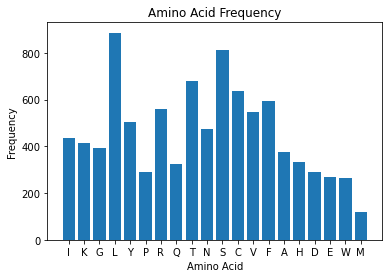

In [28]:
# Remove stop codons and visualize amino acid frequency

del common_amino['*']

pylab.bar(common_amino.keys(), common_amino.values())
pylab.title("Amino Acid Frequency")
pylab.xlabel("Amino Acid")
pylab.ylabel("Frequency")

In [29]:
# generate a list of ORFs by splitting our amino acid sequence on stop codons

protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [30]:
# Generate a data frame from protein_list, keeping only sequences longer than 10 amino acids

large_proteins = [x for x in protein_list if len(x)>10]
df = pd.DataFrame({"protein_seq":large_proteins})

In [31]:
df['length'] = df['protein_seq'].apply(len)
df.head()

protein_seq  length
0                                   QTNQLSISCRSVL      13
1                                  TNFKICVAVTRLHA      14
2             QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER      35
3  DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS      46
4                           TALCVHQTFGCSNCTSWSCYG      21

In [33]:
#sort sequences by length 
df.sort_values(by=['length'], ascending=False)

protein_seq  length
118  CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...    2701
157  ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...     290
168  TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...     123
158  AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...      83
167  QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...      63
..                                                 ...     ...
38                                         KCLLHSTIYYL      11
132                                        TSTCTSNCLWT      11
34                                         WQSSSRFCHSC      11
33                                         QTCFKLFGNEE      11
147                                        LQFWCNFKCFK      11

[190 rows x 2 columns]

In [36]:
# take the single largest protein from the list
one_large_prot = df.nlargest(1, 'length')
single_prot = one_large_prot.iloc[0,0]
single_prot

'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSY

In [37]:
# write to a file

with open("Sequence_data/single_prot.fasta", "w") as file:
    file.write('>large protein\n'+single_prot)

In [38]:
#read the fasta file for our protein 
read = SeqIO.read("Sequence_data/single_prot.fasta", "fasta")
read.seq

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [41]:
# Search for our sequence in the Protein Databank

result_handle = NCBIWWW.qblast("blastp", "pdb", read.seq)
blast_qresult = SearchIO.read(result_handle, "blast-xml")

In [42]:
print(blast_qresult[0:5])

Program: blastp (2.11.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Structure of COVID-19 RNA-dependent RNA pol...
            1      1  pdb|6YYT|A  Structure of replicating SARS-CoV-2 polymer...
            2      1  pdb|6XEZ|A  Structure of SARS-CoV-2 replication-transcr...
            3      1  pdb|7BW4|A  Structure of the RNA-dependent RNA polymera...
            4      1  pdb|6XQB|A  SARS-CoV-2 RdRp/RNA complex [Severe acute r...


In [60]:
# format/generate a short report on one of our top results

seqid = blast_qresult[1]
details = seqid[0]

print(f"\
Sequence ID: {seqid.id}\n\
Description: {seqid.description}\n\
E Value: {details.evalue}\n\
Bit Score: {details.bitscore}\n\
")

Sequence ID: pdb|6YYT|A
Description: Structure of replicating SARS-CoV-2 polymerase [Severe acute respiratory syndrome coronavirus 2]
E Value: 0.0
Bit Score: 1938.31



In [61]:
# Print the alignment between our sequence and the top result

print(f"Alignment:\n{details.aln}")

Alignment:
Alignment with 2 rows and 925 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ pdb|6YYT|A


In [62]:
# Retrieving the PDB ID for our sequence and using it to access the PDB file for 3D rendering

print(seqid.id+"\n")
print(seqid.id.split('|')[1])

pdb|6YYT|A

6YYT


In [63]:
urllib.request.urlretrieve('https://files.rcsb.org/download/6YYT.pdb', 'Sequence_data/6YYT.pdb')

('Sequence_data/6YYT.pdb', <http.client.HTTPMessage at 0x1bf31221340>)

In [64]:
#reading our pdb file

parser = PDBParser()
structure = parser.get_structure('6YYT', 'Sequence_data/6YYT.pdb')
structure

C:\Users\kenng\Anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12059.
  warnings.warn(


<Structure id=6YYT>

In [65]:
# Identify the number of chains in our structure
for chain in structure[0]:
    print(f"Chain ID: {chain.id}")

Chain ID: A
Chain ID: B
Chain ID: C
Chain ID: D
Chain ID: P
Chain ID: Q
Chain ID: T
Chain ID: U


In [66]:
#Generate a 3d visualization of our protein using nglview

view = nv.show_biopython(structure)
view

NGLWidget()

In [67]:
view.render_image()

Image(value=b'', width='99%')

## Observations

### Our initial nucleotide sequence is...
A. 29903 bases long <br>
B. Has GC Content of 39.97% <br> 
C. When translated has a high Leucine content <br> 
D. When searched using BLAST corresponds to sequences associated with SARS-CoV-2 <br>
E. One of the search results, 6YYT, has eight chains and can be seen in the visualization to contain a DNA binding domain